# Food Delivery Cost and Profitability Analysis: Process We Can Follow
Food Delivery Cost and Profitability Analysis involves examining all the costs associated with delivering food orders,
from direct expenses like delivery fees and packaging to indirect expenses like discounts offered to customers and commission fees paid by restaurants.
By juxtaposing these costs against the revenue generated (primarily through order values and commission fees),
the analysis aims to provide insights into how profitable the food delivery service is on a per-order basis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
plt.style.use('ggplot')

In [2]:
data = pd.read_csv("D:/newai/Data Analysis Project/Food Delivery Cost and Profitability Analysis/food_orders_new_delhi.csv")

In [3]:
data.head()

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                1000 non-null   int64 
 1   Customer ID             1000 non-null   object
 2   Restaurant ID           1000 non-null   object
 3   Order Date and Time     1000 non-null   object
 4   Delivery Date and Time  1000 non-null   object
 5   Order Value             1000 non-null   int64 
 6   Delivery Fee            1000 non-null   int64 
 7   Payment Method          1000 non-null   object
 8   Discounts and Offers    815 non-null    object
 9   Commission Fee          1000 non-null   int64 
 10  Payment Processing Fee  1000 non-null   int64 
 11  Refunds/Chargebacks     1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB


The dataset contains 1,000 entries and 12 columns, with no missing values in any of the columns. Now, we need to perform some data cleaning and preparation. Below are the necessary cleaning steps we need to take:

Convert “Order Date and Time” and “Delivery Date and Time” to a datetime format.
Convert “Discounts and Offers” to a consistent numeric value (if applicable) or calculate the discount amounts.
Ensure all monetary values are in a suitable format for calculations.

In [5]:
# convert date and time columns to datetime
data['Delivery Date and Time'] = pd.to_datetime(data['Delivery Date and Time'])
data['Order Date and Time'] = pd.to_datetime(data['Order Date and Time'])

In [6]:
# first, let's create a function to extract numeric values from the 'Discounts and Offers' string
def extract_discount(discount_str):
    if 'off' in discount_str:
        # Fixed amount off
        return float(discount_str.split(' ')[0])
    elif '%' in discount_str:
        # Percentage off
        return float(discount_str.split('%')[0])
    else:
        # No discount
        return 0.0

In [7]:
# apply the function to create a new 'Discount Value' column
data['Discount Percentage'] = data['Discounts and Offers'].astype(str).apply(lambda x: extract_discount(x))

In [8]:
# for percentage discounts, calculate the discount amount based on the order value
data['Discount Amount'] = data.apply(lambda x: (x['Order Value'] * x['Discount Percentage'] / 100)
                                     if x['Discount Percentage'] > 1 
                                     else x['Discount Percentage'], axis=1)

In [9]:
# adjust 'Discount Amount' for fixed discounts directly specified in the 'Discounts and Offers' column
data['Discount Amount'] = data.apply(lambda x: x['Discount Amount'] if x['Discount Percentage'] <= 1
                                     else x['Order Value'] * x['Discount Percentage'] / 100, axis=1)

In [10]:
data[['Order Value', 'Discounts and Offers', 'Discount Amount', 'Discount Percentage']].head(), data.dtypes

(   Order Value Discounts and Offers  Discount Amount  Discount Percentage
 0         1914            5% on App            95.70                  5.0
 1          986                  10%            98.60                 10.0
 2          937         15% New User           140.55                 15.0
 3         1463                  NaN             0.00                  0.0
 4         1992         50 off Promo           996.00                 50.0,
 Order ID                           int64
 Customer ID                       object
 Restaurant ID                     object
 Order Date and Time       datetime64[ns]
 Delivery Date and Time    datetime64[ns]
 Order Value                        int64
 Delivery Fee                       int64
 Payment Method                    object
 Discounts and Offers              object
 Commission Fee                     int64
 Payment Processing Fee             int64
 Refunds/Chargebacks                int64
 Discount Percentage              float64
 Di

### The data is now ready with the following adjustments:

* Order Date and Time and Delivery Date and Time columns have been converted to datetime format.
* A new column, Discount Amount, has been calculated based on the Discounts and Offers column. This was achieved by extracting percentage discounts or fixed amounts and applying them to the order value.
* Discount Percentage has been added to represent the discount rate or fixed amount discount directly.

******

# Cost and Profitability Analysis
For the cost analysis, we’ll consider the following costs associated with each order:

* Delivery Fee: The fee charged for delivering the order.
* Payment Processing Fee: The fee for processing the payment.
* Discount Amount: The discount provided on the order.
***
We’ll calculate the total cost for the platform per order and then aggregate this data to understand the overall cost structure.

The revenue for the platform is mainly derived from the Commission Fee. We’ll calculate the net profit by subtracting the total costs (including discounts) from the revenue generated through commission fees.

In [11]:
# calculate total costs and revenue per order
data['Total Costs'] = data['Delivery Fee'] + data['Payment Processing Fee'] + data['Discount Amount']
data['Revenue'] = data['Commission Fee']
data['Profit'] = data['Revenue'] - data['Total Costs']

In [12]:
# aggregate data to get overall metrics
total_orders = data.shape[0]
total_revenue = data['Revenue'].sum()
total_costs = data['Total Costs'].sum()
total_profit = data['Profit'].sum()

overall_metrics = {
    "Total Orders": total_orders,
    "Total Revenue": total_revenue,
    "Total Costs": total_costs,
    "Total Prefit": total_profit
}

In [13]:
overall_metrics

{'Total Orders': 1000,
 'Total Revenue': 126990,
 'Total Costs': 232709.85,
 'Total Prefit': -105719.85}

#### Based on the analysis, here are the overall metrics for the food delivery operations:

* Total Orders: 1,000
* Total Revenue (from Commission Fees): 126,990 INR
* Total Costs: 232,709.85 INR (including delivery fees, payment processing fees, and discounts)
* Total Profit: -105,719.85 INR

The analysis indicates that the total costs associated with the food delivery operations exceed the total revenue generated from commission fees, resulting in a net loss. It suggests that the current commission rates, delivery fees, and discount strategies might not be sustainable for profitability.

To better understand the distribution of costs, revenue, and profit, let’s plot:

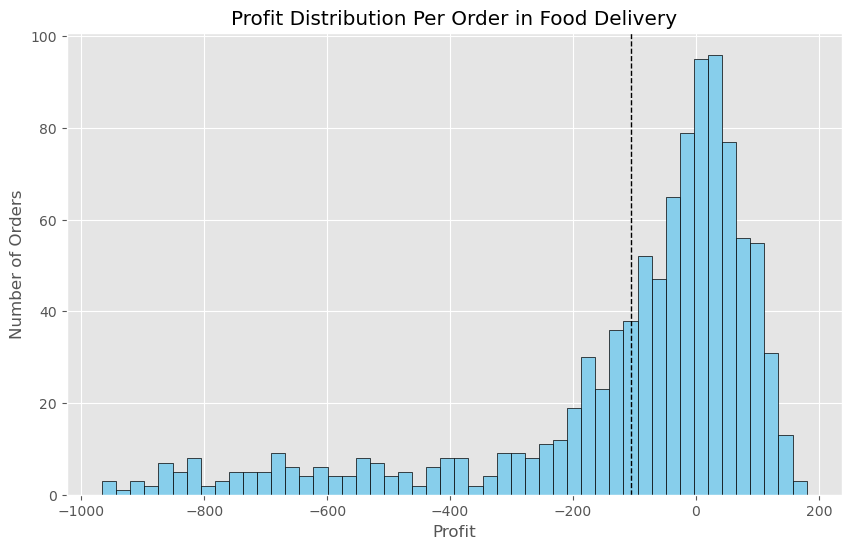

In [14]:
# histogram of profits per order
plt.figure(figsize=(10, 6))
plt.hist(data['Profit'], bins=50, color='skyblue', edgecolor='black')
plt.title('Profit Distribution Per Order in Food Delivery')
plt.xlabel('Profit')
plt.ylabel('Number of Orders')
plt.axvline(data['Profit'].mean(), color='black', linestyle='dashed', linewidth=1)

The histogram shows a wide distribution of profit per order, with a noticeable number of orders resulting in a loss (profits below 0). The black dashed line indicates the average profit, which is in the negative territory, highlighting the overall loss-making situation.

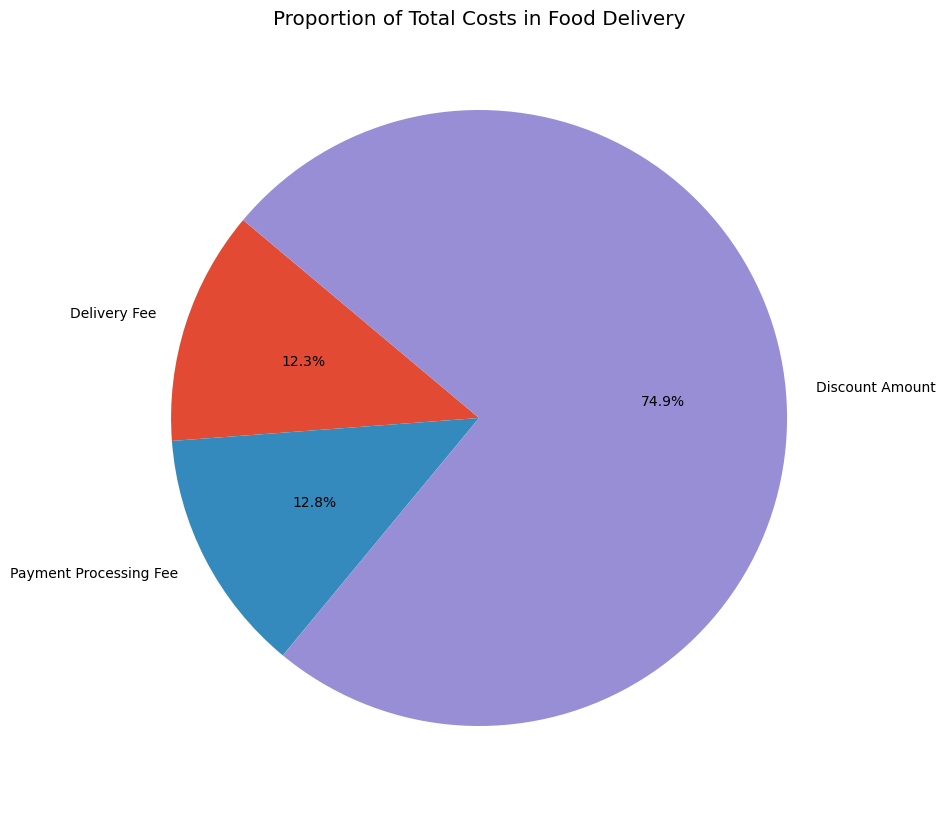

In [15]:
# pie chart for the proportion of total costs
costs_breakdown = data[['Delivery Fee', 'Payment Processing Fee',  'Discount Amount']].sum()
plt.figure(figsize=(10, 10))
plt.pie(costs_breakdown, labels=costs_breakdown.index, startangle=140, autopct='%1.1f%%')
plt.title('Proportion of Total Costs in Food Delivery');

The pie chart illustrates the breakdown of total costs into delivery fees, payment processing fees, and discount amounts. Discounts constitute a significant portion of the costs, suggesting that promotional strategies might be heavily impacting overall profitability.

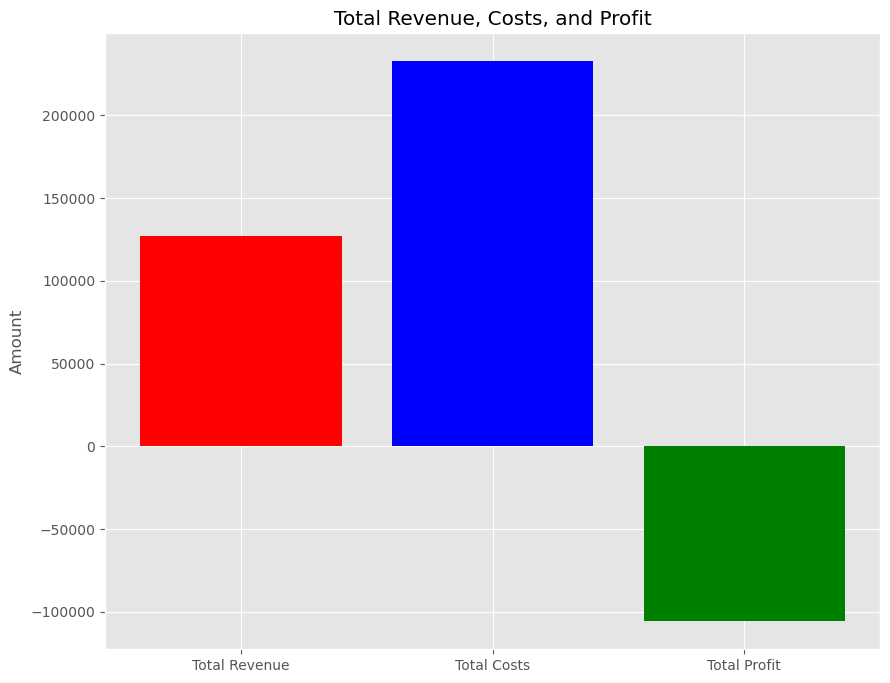

In [16]:
# bar chart for total revenue, costs, and profit
totals = ['Total Revenue', 'Total Costs', 'Total Profit']
values = [total_revenue, total_costs, total_profit]

plt.figure(figsize=(10, 8))
plt.bar(totals, values, color=['red', 'blue', 'green'])
plt.title('Total Revenue, Costs, and Profit')
plt.ylabel('Amount');

The bar chart compares total revenue, total costs, and total profit. It visually represents the gap between revenue and costs, clearly showing that the costs surpass the revenue, leading to a total loss.

*******

### A New Strategy for Profits
From the analysis so far we understood that the discounts on food orders are resulting in huge losses. Now, we need to find a new strategy for profitability. We need to find a sweet spot for offering discounts and charging commissions. To find a sweet spot for commission and discount percentages, we can analyze the characteristics of profitable orders more deeply. Specifically, we need to look for:

* A new average commission percentage based on profitable orders.
* A new average discount percentage for profitable orders, that could serve as a guideline for what level of discount still allows for profitability.

Given these new averages, we can suggest adjustments that might not only make individual orders profitable but also apply broadly across all orders to improve overall profitability. Let’s calculate:

* The average commission percentage for profitable orders.
* The average discount percentage for profitable orders.

In [17]:
# filter the dataset for profitable orders
profit_orders = data[data['Profit'] > 0]

In [22]:
# calculate the average commission percentage for profitable orders
profit_orders['Commission Precentage'] = (profit_orders['Commission Fee'] / profit_orders['Order Value']) * 100

In [23]:
# calculate the average discount percentage for profitable orders
profit_orders['Effective Discount Percentage'] = (profit_orders['Discount Amount'] / profit_orders['Order Value']) * 100

In [24]:
# calculate the new averages
new_avg_commission_percentage = profit_orders['Commission Precentage'].mean()
new_avg_discount_percentage = profit_orders['Effective Discount Percentage'].mean()

In [36]:
print(new_avg_commission_percentage, new_avg_discount_percentage)

30.508436145149435 5.867469879518072


* Based on the analysis of profitable orders, we find a new set of averages that could represent a “sweet spot” for commission and discount percentages
 
 * The average commission percentage for profitable orders is significantly higher than the overall average across all orders. It suggests that a higher commission rate on orders might be a key factor in achieving profitability. The average discount percentage for profitable orders is notably lower than the overall average, indicating that lower discounts might contribute to profitability without significantly deterring order volume.

### Now, let’s visualize a comparison of profitability using actual versus recommended discounts and commissions across all orders. For this, we need to:

* Calculate the profitability per order using the actual discounts and commissions already present in the dataset.
* Simulate profitability per order using the recommended discounts (6%) and commissions (30%) to see the potential impact on profitability.

In [37]:
# simulate profitability with recommended discounts and commissions
recommended_commission_percentage = 30.0
recommended_discount_percentage = 6.0

In [38]:
# calculate the simulated commission fee and discount amount using recommended percentages
data['Simulated Commission Fee'] = data['Order Value'] * (recommended_commission_percentage / 100)
data['Simulated Discount Amount'] = data['Order Value'] * (recommended_discount_percentage / 100)

In [40]:
# recalculate total costs and profit with simulated values
data['Simulated Total Costs'] = (data['Delivery Fee'] + 
                                 data['Payment Processing Fee'] + 
                                 data['Simulated Discount Amount'])

data['Simulated Profit'] = (data['Simulated Commission Fee'] - 
                            data['Simulated Total Costs'])

c:\Users\Mohamed Makki\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Mohamed Makki\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


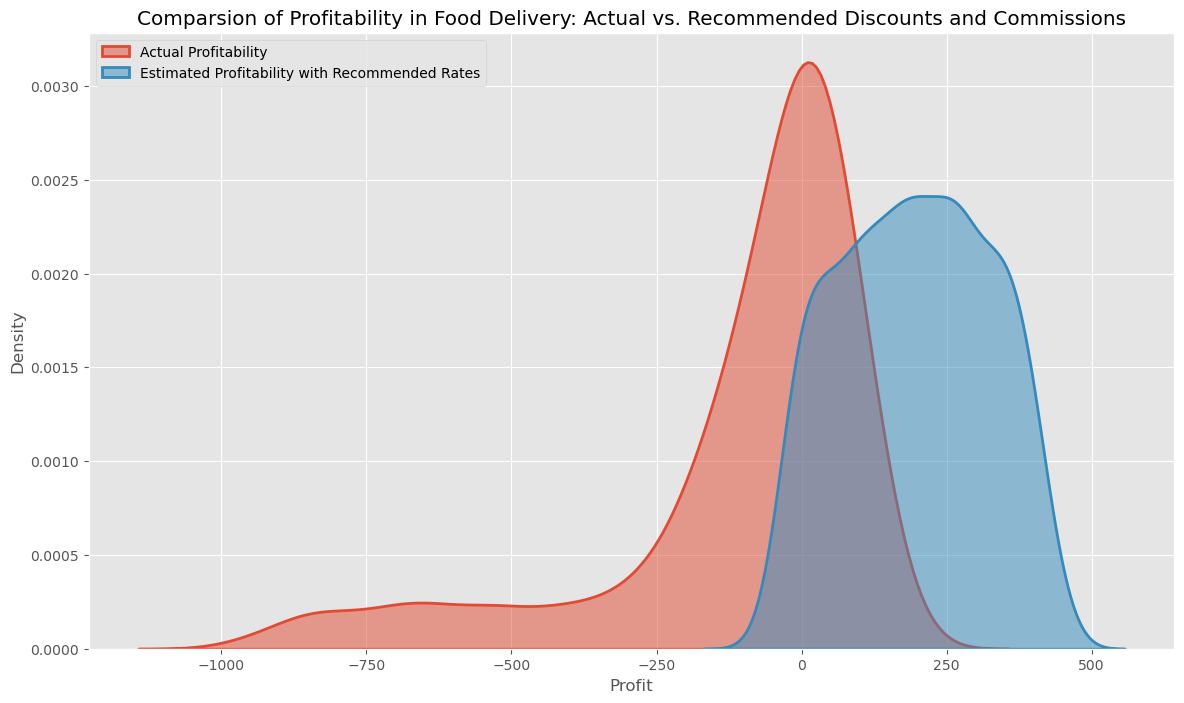

In [61]:
# visualizing the comparison

plt.figure(figsize=(14,8))

# actual profitability
sns.kdeplot(data['Profit'], label='Actual Profitability', fill=True, alpha=0.5, linewidth=2)

# simulate profitability
sns.kdeplot(data['Simulated Profit'], label='Estimated Profitability with Recommended Rates', fill=True, alpha=0.5, linewidth=2)

plt.title('Comparsion of Profitability in Food Delivery: Actual vs. Recommended Discounts and Commissions')
plt.xlabel('Profit')
plt.ylabel('Density')
plt.legend(loc='upper left')

The actual profitability distribution shows a mix, with a significant portion of orders resulting in losses (profit < 0) and a broad spread of profit levels for orders. The simulated scenario suggests a shift towards higher profitability per order. The distribution is more skewed towards positive profit, indicating that the recommended adjustments could lead to a higher proportion of profitable orders

### Summary
So, this is how you can analyze the cost and profitability of a food delivery company. Food Delivery Cost and Profitability Analysis involves examining all the costs associated with delivering food orders, from direct expenses like delivery fees and packaging to indirect expenses like discounts offered to customers and commission fees paid by restaurants. By juxtaposing these costs against the revenue generated (primarily through order values and commission fees), the analysis aims to provide insights into how profitable the food delivery service is on a per-order basis.